<a href="https://colab.research.google.com/github/JorgeFBZ/BPP/blob/main/Clasificaci%C3%B3n_B%C3%A1sica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tensor Flow:**
##1- Clasificacion Basica. Predecir una imagen.
Red neuronal para clasificar tipos de ropa. Fashion MNIST

[texto del enlace](https://www.tensorflow.org/tutorials/keras/classification?hl=es-419)

In [32]:
# Importar librerías
import tensorflow as tf
from tensorflow import keras
print (tf.__version__)

# Libreías de secundarias:
import matplotlib.pyplot as plt
import numpy as np

2.8.0


##1- Cargamos el conjunto de datos:
Descargamos el dataset Fashion MNIST incluido en Keras y creamos los conjuntos de entrenamiento y test.

(4 np.array que contiene imagen + label)

In [33]:
fashion_mnist = keras.datasets.fashion_mnist
# Crear coanjuntos de test y train:
(train_img, train_label),(test_img, test_label)= fashion_mnist.load_data()

Las etiquetas de las imagenes estan codificadas con numeros del 0 al 9.

Para poder generar un resultado mas comprensible, creamos una lista con los nombres de las clases con la que mediante el indice de listas obtendremos el resultado de la clasificación.

In [34]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [35]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##2- Exploracion del set de datos:
Visualizar las caracteristicas del dataset.

In [36]:
# Numero y resolucion de imagenes para entrenamiento:
train_img.shape
# 60000 imagenes de 28x28px

(60000, 28, 28)

In [37]:
# Numero de etiquetas para entrenamiento:
len(train_label)

60000

In [38]:
# Numero y resolucion de imagenes para test:
test_img.shape
# 10000 imagenes de 28x28px

(10000, 28, 28)

In [39]:
# Numero de etiquetas para Test:
len(test_label)

10000

## Preprocesado de los datos:

Las imagenes se encuentran con valores de los pixeles entre 0 y 255. Para procesar las imagenes en la red neuronal es necesario que los valores de los pixeles se encuentren entre 0 y 1.

Para ello, dividimos la imagen entre 255.


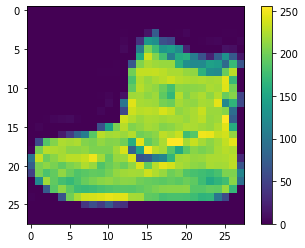

In [40]:
# Visualizacion de la primera imagen: --> Valores entre 0 y 255
plt.figure()
plt.imshow(train_img[0])
plt.colorbar()
plt.grid(False)
plt.show()

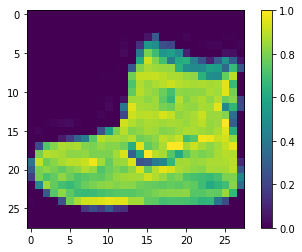

In [41]:
# Visualizacion de la primera imagen: --> Valores entre 0 y 1
plt.figure()
plt.imshow(train_img[0]/255)
plt.colorbar()
plt.grid(False)
plt.show()

In [42]:
# Modificar los valores de los pixeles de todas las imagenes.
test_img = test_img/255
train_img= train_img/255

## 3- Creación del modelo:
Creamos el modelo con 3 capas:


*   **Flatten**: Capa que transforma las imagenes en un array unidimensional (pasa de 28*28px a 784px) esta capa solo reformatea los datos de entrada.
*   **Dense**:  estas dos capas estan densamente conectadas. La primera capa cuenta con 128 nodos. La ultima capa tiene 10 nodos para la clasificacion de la imagen (devuelve una probabilidad de pertenecia a cada una de las clases que suman 1)





In [43]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation="relu"),
                          keras.layers.Dense(10, activation="softmax")
])

##4- Compilar el modelo:
Configuracion del modelo para la compilacion:


*   **Loss Funcition (funcion de perdida)**: Exactitud del modelo. Minimizar esta funcion para un mejor modelo.
*   **Optimizer**: Como se actualiza el modelo en funcion de l Loss funiction y el dataset con el que esta siendo entrenado.
*   **Metrics**: Monitorizacion del entrenamiento, obtiene parametros de exactitud, precision,etc.



In [44]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

## 5- Entrenar el modelo:
Para entrenar el modelo, introducimos en set de datos de entrenamiento con las etiquetas correspondientes. Con esto, el modelo aprende a asociar las imagenes con la etiqueta.

Posteriormente, predecimos con el modelo el set de datos de test, esta vez sin introducir etiquetas, y comparamos los resultados para ajustar el modelo y evaluar la exactitud del mismo.


**Forwardpropagation** proceso en el que la red neuronal (inicialmente con **W** y **b** aleatorios) procesa los datos de entrada para generar un resultado.


**Backpropagation** proceso que optimiza la funcion de perdida mediante el calculo de gradientes de **W** y **b** para ver como afectan a la funcion de perdida. con cada iteracion se modifican los parametros **W** y **b**. Depende de los algoritmos de optimizacion.


**Epoch** es el numero de ciclos forwardpropagarion-backpropagation que realiza el modelo para ajustar los pesos (**W** y **b**) de las neuronas.

In [45]:
# Ajustar el modelo:
model.fit(train_img, train_label, epochs=11)

Epoch 1/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5006 - accuracy: 0.8233
Epoch 2/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3779 - accuracy: 0.8636
Epoch 3/11
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3380 - accuracy: 0.8772
Epoch 4/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3132 - accuracy: 0.8853
Epoch 5/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2944 - accuracy: 0.8924
Epoch 6/11
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2821 - accuracy: 0.8957
Epoch 7/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2675 - accuracy: 0.9013
Epoch 8/11
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2559 - accuracy: 0.9048
Epoch 9/11
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2474 - accuracy: 0.9079
Epoch 10/11
1875/1875 [==============================] - 5s 2ms/step - loss: 0.238

###Evaluar el modelo:

In [46]:
test_loss, test_acc = model.evaluate(test_img, test_label, verbose= 2)
print ('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3373 - accuracy: 0.8811 - 578ms/epoch - 2ms/step

Test accuracy: 0.8810999989509583


La exactitud sobre el set de datos es menor que la del set de entrenamiento debido al sobreajuste (overfitting). El modelo tiene un peor rendimento sobre un set de datos nuevo

## 6- Hacer predicciones:


In [47]:
predictions = model.predict(test_img)

In [48]:
predictions[0]

array([3.7631980e-07, 7.7915253e-08, 1.6136089e-07, 1.1999445e-07,
       9.0006392e-07, 4.1049784e-03, 7.0056981e-06, 2.0117098e-02,
       1.6284217e-07, 9.7576910e-01], dtype=float32)

El modelo devuelve un array que contiene la probabilidad de pertenencia a una de las 10 clases.

In [49]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

### Graficos con la predicicon de las clases:

In [50]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

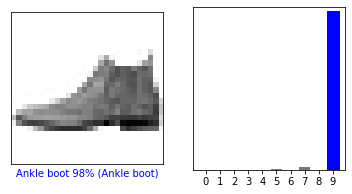

In [51]:
i = 0 ## Numero de imagen a visualizar
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_label, test_img)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_label)
plt.show()


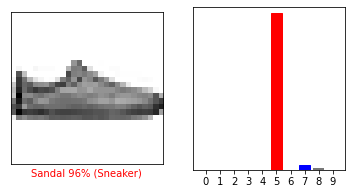

In [52]:
i = 12 ## Numero de imagen a visualizar
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_label, test_img)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_label)
plt.show()


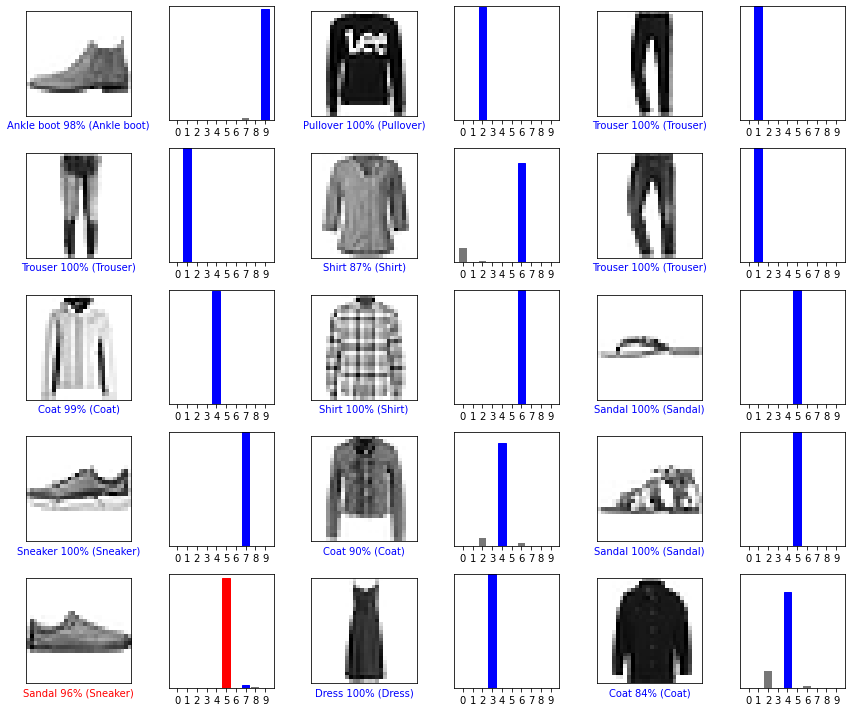

In [54]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_label, test_img)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_label)
plt.tight_layout()
plt.show()